In [24]:
import numpy as np
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.layers import BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical, pad_sequences
import matplotlib.pyplot as plt

In [25]:
from tensorflow.keras.datasets import cifar10

In [26]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train_r = X_train/255.
X_test_r = X_test/255.
y_train_r = to_categorical(y_train)
y_test_r = to_categorical(y_test)

In [27]:
model = Sequential(
    [
        Conv2D(16,(3,3), activation='relu', strides=1, padding='same', input_shape=(32,32,3)),
        MaxPooling2D(2,2),
        BatchNormalization(),
        Conv2D(32,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),
        Flatten(),
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dense(10,activation='softmax')
    ]
)

In [7]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer = optimizer, loss=loss, metrics=metrics)

In [8]:
model.fit(X_train_r, y_train_r, epochs=10)

Epoch 1/10


2023-06-01 09:25:54.659252: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 18s 11ms/step - loss: 1.4904 - accuracy: 0.4934
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0853 - accuracy: 0.6237
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9265 - accuracy: 0.6775
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8248 - accuracy: 0.7138
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7398 - accuracy: 0.7423
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6680 - accuracy: 0.7656
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6081 - accuracy: 0.7864
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5504 - accuracy: 0.8067
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5011 - accuracy: 0.8235
Epoch 10/10
1563/1563 [==============================] - 17s 11ms/step - lo

In [34]:
model1 = Sequential(
    [
        Conv2D(32,3, strides=1,padding='same', input_shape=(32,32,3)),
        LeakyReLU(),
        BatchNormalization(),
        Conv2D(32,3, strides=2,padding='same'),
        LeakyReLU(),
        BatchNormalization(),
        Conv2D(64,3, strides=1,padding='same'),
        LeakyReLU(),
        BatchNormalization(),
        Conv2D(64,3, strides=2,padding='same'),
        LeakyReLU(),
        BatchNormalization(),
        Flatten(),
        Dense(128),
        Activation('relu'),
        Dropout(0.5),
        Dense(10),
        Activation('softmax')
    ]
)

In [35]:
model1.compile(optimizer = optimizer, loss=loss, metrics=metrics)

In [36]:
model1.fit(X_train_r, y_train_r, epochs=10)

Epoch 1/10


2023-06-01 10:01:15.419486: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 46s 29ms/step - loss: 1.8167 - accuracy: 0.3316
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4806 - accuracy: 0.4636
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.2742 - accuracy: 0.5497
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1338 - accuracy: 0.6020
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0285 - accuracy: 0.6367
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9557 - accuracy: 0.6645
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8939 - accuracy: 0.6886
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8391 - accuracy: 0.7054
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7977 - accuracy: 0.7187
Epoch 10/10
1563/1563 [==============================] - 47s 30ms/step - lo

1/1 [==============================] - 0s 108ms/step
정답


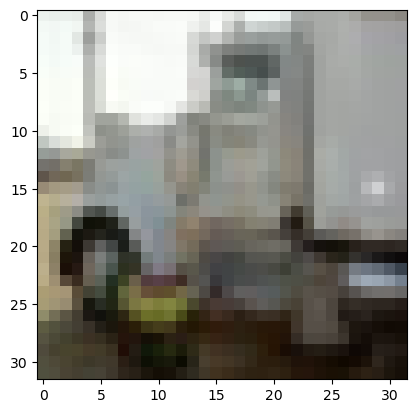

1/1 [==============================] - 0s 16ms/step
정답


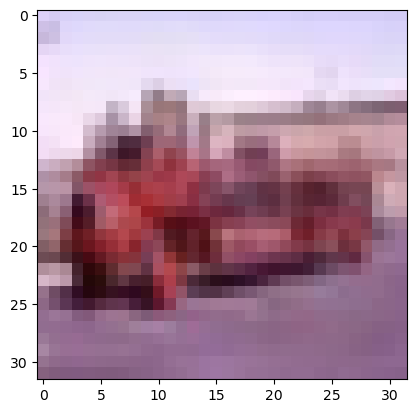

1/1 [==============================] - 0s 16ms/step
예측값은 8 ====> 실제값은 [0]


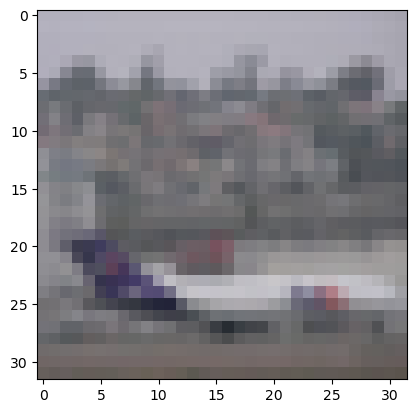

1/1 [==============================] - 0s 16ms/step
정답


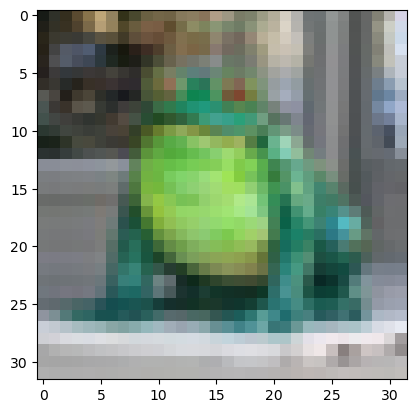

In [37]:
x = [31, 67, 30000, 19]
for i in x:
    y_pred = np.argmax(model1.predict(X_train[[i]]))
    real = y_train[i]
    if y_pred == real:
        print('정답')
    else:
        print(f'예측값은 {y_pred} ====> 실제값은 {real}')
    plt.imshow(X_train[i])
    plt.show()